## 1)

In [1]:
import pandas as pd
regs = pd.read_csv("regs.csv")
print(len(regs))
regs.head(5)

360


,emission_band,type_of_fuel,engine_capacity_cc,reg_count
0,Band A,Petrol,Up to 900 cc,0
1,Band A,Petrol,901-1000 cc,533
2,Band A,Petrol,1001-1300 cc,224
3,Band A,Petrol,1301-1400 cc,23
4,Band A,Petrol,1401-1500 cc,0


## 2)

In [2]:
# Add up the numbers for each capacity value
import numpy as np
count_by_cc = pd.pivot_table(regs, values='reg_count', index='engine_capacity_cc', aggfunc=np.sum)
count_by_cc

,reg_count
engine_capacity_cc,
1001-1300 cc,3226
1301-1400 cc,2574
1401-1500 cc,1638
1501-1600 cc,3602
1601-2000 cc,4035
2001-2400 cc,694
901-1000 cc,562
>2400 cc,221
Up to 900 cc,1


In [3]:
# Reorder the rows
count_by_cc = count_by_cc.reindex(index=count_by_cc.index[[8, 6, 0, 1, 2, 3, 4, 5, 7]])
count_by_cc

,reg_count
engine_capacity_cc,
Up to 900 cc,1
901-1000 cc,562
1001-1300 cc,3226
1301-1400 cc,2574
1401-1500 cc,1638
1501-1600 cc,3602
1601-2000 cc,4035
2001-2400 cc,694
>2400 cc,221


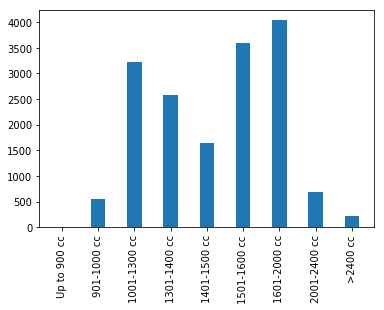

In [6]:
import matplotlib.pyplot as plt
# Make the x-axis tick text vertical so that it fits without having to stretch the picture
plt.xticks(rotation=90)
plt.bar(range(0, 17, 2), height=count_by_cc['reg_count'], tick_label=count_by_cc.index)
# Function savefig() must be called before show(); 
# the bbox_inches value 'tight' forces the function to fit exactly everything into the png
plt.savefig('cc_counts_bar.png', format='png', bbox_inches='tight')
plt.show()

## 3)

To find if higher-engine-capacity cars were more popular, we can calculate the Kendall Tau for capacity against  numbers registered. 

In [5]:
# As the kendalltau() function would re-arrange the capacity labels alphabetically we will use numbers instead
# to express the ordering, which is from lowest to highest in the count_by_cc table
sps.kendalltau([1, 2, 3, 4, 5, 6, 7, 8, 9], count_by_cc['reg_count'])

NameError: name 'sps' is not defined

**Interpretation:** The p-value indicates that we can assume that there is no correlation i.e. that cars with larger engine capacity were not more popular in the month that the data pertains to.

## 4)

In [142]:
# Contingency table
ft_ec_tab = pd.crosstab(index=regs['type_of_fuel'], columns=regs['engine_capacity_cc'], values=regs['reg_count'], aggfunc=np.sum)
ft_ec_tab

engine_capacity_cc,1001-1300 cc,1301-1400 cc,1401-1500 cc,1501-1600 cc,1601-2000 cc,2001-2400 cc,901-1000 cc,>2400 cc,Up to 900 cc
type_of_fuel,,,,,,,,,
Diesel,104,686,1504,2855,3715,693,0,167,0
Ethanol and petrol,504,0,0,8,11,0,0,0,0
Other fuel types,0,0,0,0,0,0,0,0,1
Petrol,2618,1847,134,739,254,1,562,20,0
Petrol and electric hybrid,0,41,0,0,55,0,0,34,0


In [147]:
# Sub-table
ft_ec_subtab = ft_ec_tab.loc[['Diesel', 'Petrol']].iloc[:, :5]
ft_ec_subtab

engine_capacity_cc,1001-1300 cc,1301-1400 cc,1401-1500 cc,1501-1600 cc,1601-2000 cc
type_of_fuel,,,,,
Diesel,104,686,1504,2855,3715
Petrol,2618,1847,134,739,254


In [152]:
# Chi-squared test
chisq, p, dof, evs = sps.chi2_contingency(ft_ec_subtab)
print("chi-squared " + str(chisq))
print("p = " + str(p))
print("degrees of freedom = " + str(dof))
print("expected value table: ")
print(evs)

chi-squared 7929.356391301598
p = 0.0
degrees of freedom = 4
expected value table: 
[[1669.05146652 1553.16214721 1004.37410072 2203.73657997 2433.67570559]
 [1052.94853348  979.83785279  633.62589928 1390.26342003 1535.32429441]]


A p-value so close to 0 that it is approximated as 0 by the chi-square function indicates that with a level significance of almost 0 we can conclude that there is a relationship between engine capacity and fuel type.